In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("Set2")

import warnings
warnings.filterwarnings("ignore")

from classifier_utils import *
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from mlxtend.regressor import StackingCVRegressor

import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [2]:
# Load data 
df = pd.read_csv("../../Hanoi-Housing-Prices-Prediction/Feature engineering/remaining_nhaban.csv")
df_columns = df.columns.tolist() 
print("+ Shape: ", df.shape) # (Number of Lines, Number of Columns)
print("+ Column: ", df_columns) # Name the attribute columns.
df.info()

+ Shape:  (25504, 34)
+ Column:  ['Đường/Phố', 'Phường/Xã', 'Quận/Huyện', 'Phân loại quận', 'Loại tin', 'Mã tin', 'Diện tích', 'Mức giá', 'Mặt tiền', 'Đường vào', 'Hướng ban công', 'Hướng nhà', 'Số tầng', 'Số phòng ngủ', 'Số toilet', 'Pháp lý', 'Nội thất', 'Loại hình', 'Nhóm 1-Trường học', 'Nhóm 1- Chợ/Siêu thị', 'Nhóm 1-Bệnh viện', 'Công viên', 'Loại ngõ', 'Vỉa hè', 'Bán gấp', 'Sân phơi', 'Nhà thoáng', 'Gần hồ', 'An ninh', 'Hiện đại', 'Chỗ để xe', 'Thang máy', 'Lô góc', 'Hỗ trợ vay']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25504 entries, 0 to 25503
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Đường/Phố             22884 non-null  object 
 1   Phường/Xã             25367 non-null  object 
 2   Quận/Huyện            25504 non-null  object 
 3   Phân loại quận        25504 non-null  object 
 4   Loại tin              25504 non-null  object 
 5   Mã tin                25504 non-null  i

In [3]:
df

,Đường/Phố,Phường/Xã,Quận/Huyện,Phân loại quận,Loại tin,Mã tin,Diện tích,Mức giá,Mặt tiền,Đường vào,...,Bán gấp,Sân phơi,Nhà thoáng,Gần hồ,An ninh,Hiện đại,Chỗ để xe,Thang máy,Lô góc,Hỗ trợ vay
0,Tố Hữu,Dương Nội,Hà Đông,Nội thành,Tin thường,39159568,50.0,186.0,NaN,NaN,...,1,0,0,0,1,0,0,0,0,0
1,Tố Hữu,La Khê,Hà Đông,Nội thành,Tin thường,38451107,264.0,126.9,NaN,NaN,...,0,0,1,0,0,1,1,0,0,0
2,Đại lộ Thăng Long,An Thượng,Hoài Đức,Ngoại thành,Tin thường,39204669,99.0,121.2,5.00,15.0,...,0,0,0,0,1,0,0,0,1,0
3,Cầu Cốc,Tây Mỗ,Nam Từ Liêm,Nội thành,Tin thường,39214622,30.0,113.3,3.54,2.0,...,0,0,0,0,0,0,0,0,0,0
4,Hoàng Hoa Thám,Liễu Giai,Ba Đình,Nội thành,Tin thường,38856881,90.0,305.6,5.20,10.0,...,0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25499,Tây Sơn,Yết Kiêu,Hà Đông,Nội thành,Tin thường,39229326,40.9,216.6,5.00,NaN,...,0,0,0,0,0,1,0,0,0,0
25500,Hoàng Cầu,Ô Chợ Dừa,Đống Đa,Nội thành,Tin thường,38672743,220.0,409.1,8.50,NaN,...,0,0,0,1,0,1,1,0,0,0
25501,Tôn Đức Thắng,Quốc Tử Giám,Đống Đa,Nội thành,Tin thường,39203647,46.0,571.7,NaN,NaN,...,0,1,1,0,0,0,0,0,1,0
25502,Đồng Cổ,Bưởi,Tây Hồ,Nội thành,Tin thường,35029152,51.0,205.9,7.50,NaN,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.isnull().sum()/df.shape[0] * 100.00

Đường/Phố               10.272898
Phường/Xã                0.537171
Quận/Huyện               0.000000
Phân loại quận           0.000000
Loại tin                 0.000000
Mã tin                   0.000000
Diện tích                0.000000
Mức giá                  0.000000
Mặt tiền                35.633626
Đường vào               52.270232
Hướng ban công          87.966593
Hướng nhà               81.026506
Số tầng                 15.734787
Số phòng ngủ            31.030427
Số toilet               37.837202
Pháp lý                  0.000000
Nội thất                 0.000000
Loại hình                0.000000
Nhóm 1-Trường học        0.000000
Nhóm 1- Chợ/Siêu thị     0.000000
Nhóm 1-Bệnh viện         0.000000
Công viên                0.000000
Loại ngõ                78.058344
Vỉa hè                   0.000000
Bán gấp                  0.000000
Sân phơi                 0.000000
Nhà thoáng               0.000000
Gần hồ                   0.000000
An ninh                  0.000000
Hiện đại      

In [5]:
columns_to_drop = ['Loại tin', 'Mã tin', 'Hướng nhà', 'Hướng ban công', 'Nội thất', 'Loại ngõ', 'Loại hình']
df.drop(columns=columns_to_drop, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25504 entries, 0 to 25503
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Đường/Phố             22884 non-null  object 
 1   Phường/Xã             25367 non-null  object 
 2   Quận/Huyện            25504 non-null  object 
 3   Phân loại quận        25504 non-null  object 
 4   Diện tích             25504 non-null  float64
 5   Mức giá               25504 non-null  float64
 6   Mặt tiền              16416 non-null  float64
 7   Đường vào             12173 non-null  float64
 8   Số tầng               21491 non-null  float64
 9   Số phòng ngủ          17590 non-null  float64
 10  Số toilet             15854 non-null  float64
 11  Pháp lý               25504 non-null  object 
 12  Nhóm 1-Trường học     25504 non-null  int64  
 13  Nhóm 1- Chợ/Siêu thị  25504 non-null  int64  
 14  Nhóm 1-Bệnh viện      25504 non-null  int64  
 15  Công viên          

In [6]:
# Fill NaN
df['Phường/Xã'].fillna(df['Phường/Xã'].mode()[0], inplace=True)
df['Đường/Phố'].fillna(df['Đường/Phố'].mode()[0], inplace=True)

phuongloai_mapping = {'Nội thành': 1, 'Ngoại thành': 0}
df['Phân loại quận'] = df['Phân loại quận'].map(phuongloai_mapping)

# One-Hot Encoding 
onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(df[['Quận/Huyện']]).toarray()
onehot_encoded_df = pd.DataFrame(onehot_encoded, 
                                 columns=onehot_encoder.get_feature_names_out(['Quận/Huyện']), 
                                 dtype=bool)
onehot_encoded_df = onehot_encoded_df * 1

onehot_encoder_phap_ly = OneHotEncoder()
phap_ly_encoded = onehot_encoder_phap_ly.fit_transform(df[['Pháp lý']]).toarray()
phap_ly_encoded_df = pd.DataFrame(phap_ly_encoded, 
                                  columns=onehot_encoder_phap_ly.get_feature_names_out(['Pháp lý']), 
                                  dtype=bool)
phap_ly_encoded_df = phap_ly_encoded_df * 1

df = pd.concat([df, onehot_encoded_df], axis=1)
df.drop(columns=['Quận/Huyện'], inplace=True)

df = pd.concat([df, phap_ly_encoded_df], axis=1)
df.drop(columns=['Pháp lý'], inplace=True)

# Label Encoding 
label_encoder_px = LabelEncoder()
df['Phường/Xã'] = label_encoder_px.fit_transform(df['Phường/Xã'].str.replace("Phường ", ""))
df['Đường/Phố'] = label_encoder_px.fit_transform(df['Đường/Phố'].str.replace("Đường ", ""))

print(df)

       Đường/Phố  Phường/Xã  Phân loại quận  Diện tích  Mức giá  Mặt tiền  \
0            971         42               1       50.0    186.0       NaN   
1            971        104               1      264.0    126.9       NaN   
2           1146          1               0       99.0    121.2      5.00   
3            140        270               1       30.0    113.3      3.54   
4            239        112               1       90.0    305.6      5.20   
...          ...        ...             ...        ...      ...       ...   
25499        944        314               1       40.9    216.6      5.00   
25500        237        315               1      220.0    409.1      8.50   
25501        957        201               1       46.0    571.7       NaN   
25502       1166         11               1       51.0    205.9      7.50   
25503        584         15               1      110.0    590.9      6.00   

       Đường vào  Số tầng  Số phòng ngủ  Số toilet  ...  \
0            NaN

In [7]:
def predict_missing_values(df, target_column):
    """
    Predict and fill missing values for the target_column in DataFrame df.
    """
    # Split data into training set and prediction set
    train = df[df[target_column].notnull()]
    test = df[df[target_column].isnull()]

    # If no data for training or prediction, skip
    if train.empty or test.empty:
        return df

    # Data for the model
    features = df.drop([target_column], axis=1)

    # Train the model
    model = RandomForestRegressor()
    model.fit(train.drop([target_column], axis=1), train[target_column])

    # Predict missing values
    predicted = model.predict(test.drop([target_column], axis=1))

    # Fill predicted values into the column
    df.loc[df[target_column].isnull(), target_column] = predicted

    return df

In [8]:
# List of columns to impute
columns_to_impute = ['Mặt tiền', 'Đường vào', 'Số tầng', 'Số phòng ngủ', 'Số toilet']

# Predict and fill missing values for each column
for column in columns_to_impute:
    df = predict_missing_values(df, column)


In [9]:
df.isnull().sum()/df.shape[0] * 100.00

Đường/Phố                                 0.0
Phường/Xã                                 0.0
Phân loại quận                            0.0
Diện tích                                 0.0
Mức giá                                   0.0
Mặt tiền                                  0.0
Đường vào                                 0.0
Số tầng                                   0.0
Số phòng ngủ                              0.0
Số toilet                                 0.0
Nhóm 1-Trường học                         0.0
Nhóm 1- Chợ/Siêu thị                      0.0
Nhóm 1-Bệnh viện                          0.0
Công viên                                 0.0
Vỉa hè                                    0.0
Bán gấp                                   0.0
Sân phơi                                  0.0
Nhà thoáng                                0.0
Gần hồ                                    0.0
An ninh                                   0.0
Hiện đại                                  0.0
Chỗ để xe                         

In [10]:
df

,Đường/Phố,Phường/Xã,Phân loại quận,Diện tích,Mức giá,Mặt tiền,Đường vào,Số tầng,Số phòng ngủ,Số toilet,...,Quận/Huyện_Đan Phượng,Quận/Huyện_Đông Anh,Quận/Huyện_Đống Đa,Quận/Huyện_Ứng Hòa,Pháp lý_Hợp đồng mua bán,Pháp lý_Khác,Pháp lý_Sổ chung,"Pháp lý_Sổ đỏ, sổ hồng, pháp lý đầy đủ",Pháp lý_Vi bằng,Pháp lý_Đang chờ sổ
0,971,42,1,50.0,186.0,4.6369,13.915,5.0,4.82,4.25,...,0,0,0,0,0,0,0,1,0,0
1,971,104,1,264.0,126.9,12.4310,16.565,4.0,5.00,6.00,...,0,0,0,0,0,0,0,1,0,0
2,1146,1,0,99.0,121.2,5.0000,15.000,4.0,4.00,4.00,...,0,0,0,0,0,1,0,0,0,0
3,140,270,1,30.0,113.3,3.5400,2.000,5.0,3.00,4.00,...,0,0,0,0,0,0,0,1,0,0
4,239,112,1,90.0,305.6,5.2000,10.000,5.0,6.00,6.00,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25499,944,314,1,40.9,216.6,5.0000,12.265,5.0,3.00,4.00,...,0,0,0,0,0,0,0,1,0,0
25500,237,315,1,220.0,409.1,8.5000,24.860,8.0,16.15,15.01,...,0,0,1,0,0,0,0,1,0,0
25501,957,201,1,46.0,571.7,5.8370,28.620,4.0,3.00,4.00,...,0,0,1,0,0,0,0,1,0,0
25502,1166,11,1,51.0,205.9,7.5000,6.110,4.0,4.00,3.00,...,0,0,0,0,0,0,0,1,0,0


In [11]:
# Split data into features and target variable
X_train, y_train, X_test, y_test = divide_dataset(df, target='Mức giá')

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(22953, 58) (22953,) (2551, 58) (2551,)


**Basic Models:**
1. Linear Regression
- Linear Regression is a statistical method for modeling the relationship between a dependent variable with a continuous value and independent variables, which can have either continuous or categorical values. In other words, "Linear Regression" is a method to predict the dependent variable (Y) based on the values of independent variables (X).
- The Linear Regression model seeks the best-fitting linear line to model the relationship between the dependent variable and independent variables. The parameters of the model are found through optimization methods, aiming to minimize the error between predictions and actual values. The result is a simple, understandable, and easy-to-use model, providing the ability to predict new values based on known input variables.

2. Decision Tree
- A Decision Tree is a machine learning method used in both regression and classification problems. It operates by dividing the data into smaller parts and guiding each decision based on the features of the data. Each node in the tree represents a decision based on a feature, and the branches of the node represent the outcomes of the decision. This process continues until predefined stopping conditions are met, such as a minimum number of samples in each leaf or maximum tree depth.

3. Random Forest
- Random Forest is an Ensemble Learning technique, where a series of decision trees are constructed by enhancing Bootstrapping and Bagging techniques.
- Bootstrapping is a statistical technique generating B new datasets from an original dataset of size N, with samples drawn randomly from the dataset, allowing for resampling and potentially repeated instances.
- Bagging fits models on datasets drawn using Bootstrapping technique and averages the prediction results of those models to obtain a new model with lower variance.
- Bagging is an effective Ensemble Learning technique as each decision tree is fitted with a slightly different training set, leading to slightly different results. Unlike conventional decision tree models, such as Classification and Regression Trees (CART), they often overfit the training dataset. Bagging helps to diversify each tree, reducing variance and prediction errors.
- Unlike Bagging, Random Forest samples not only observations in the dataset but also samples over all features and randomly selects a subset to construct the decision tree. Sampling over features helps each tree not to use the same amount of information to make decisions, thus reducing the correlation among different trees.

4. Gradient Boosting
- Gradient Boosting is a popular and powerful machine learning algorithm for handling tabular datasets. It effectively captures nonlinear relationships between the target variable and input variables.
- In Gradient Boosting, we build a sequence of weak decision trees, called base learners. Each base learner is built based on adjusting the prediction errors of the previous tree. This process is done by optimizing the loss function, adjusting the weights of the base learners to minimize the prediction errors.
- Gradient Boosting algorithm uses gradient descent optimization method to adjust the weights of the base learners. This method searches for the best descent direction of the loss function in the weight space. This process iterates repeatedly, with each iteration creating a new base learner and updating their weights.
- One of the strengths of Gradient Boosting is its ability to handle complex tabular data without requiring special preprocessing. It can work with numerical and categorical variables, while handling missing values and outliers. Additionally, Gradient Boosting is resistant to overfitting and builds accurate prediction models.

Training Linear Regression...


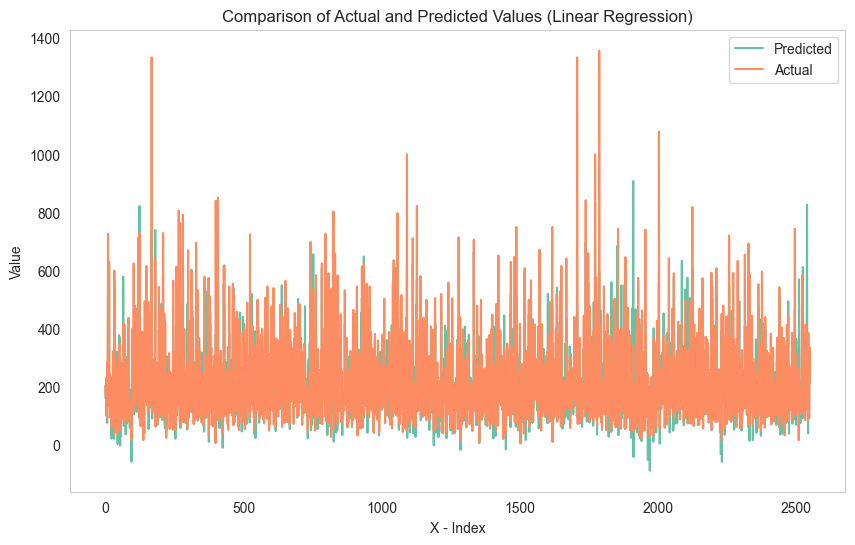

Training Decision Tree...


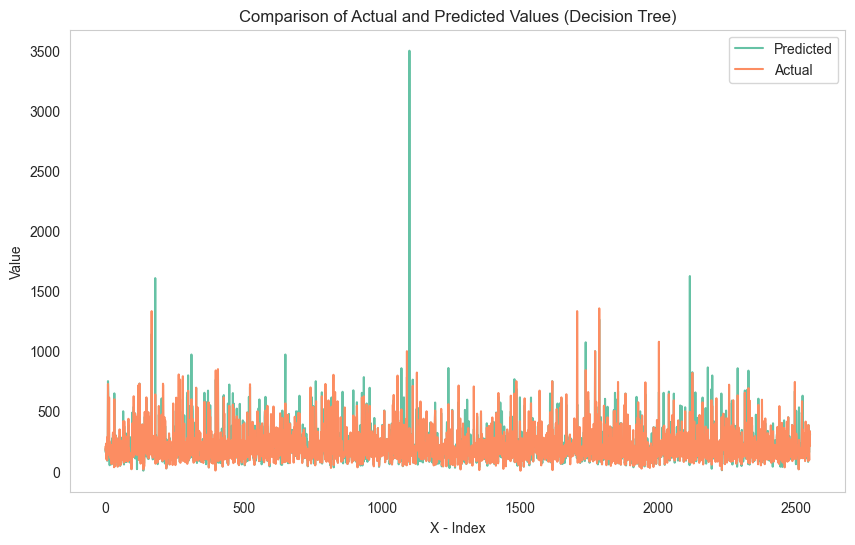

Training Random Forest...


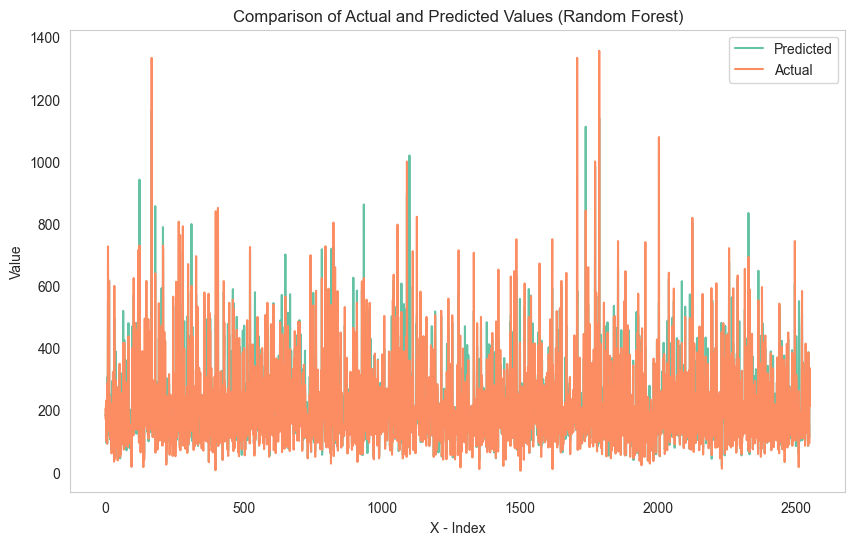

Training Gradient Boosting...


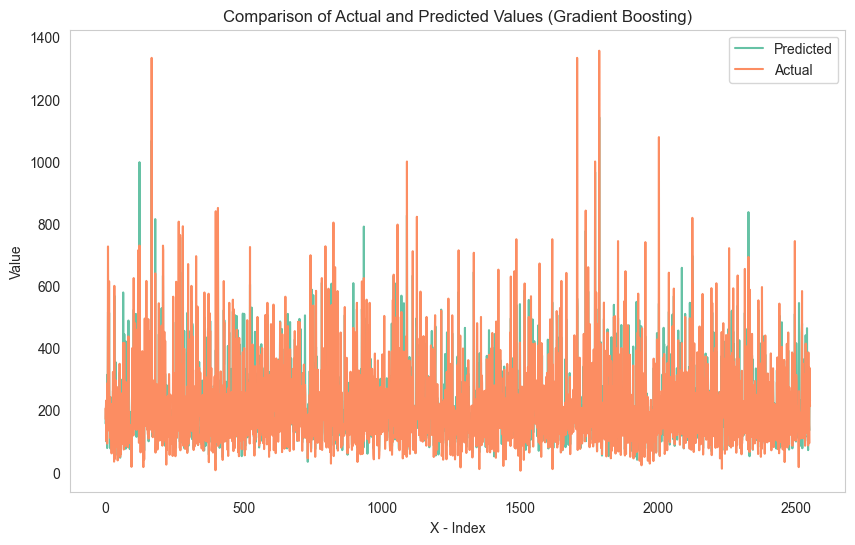

,Model,RMSE,MAE,R-squared
0,Linear Regression,84.384847,56.226380,0.631564
1,Decision Tree,89.280782,50.415210,0.587571
2,Random Forest,64.414767,37.471662,0.785314
3,Gradient Boosting,69.021994,45.487201,0.753505


In [12]:
# Initialize regression models
models = {
    'Linear Regression': LinearRegression,
    'Decision Tree': DecisionTreeRegressor,
    'Random Forest': RandomForestRegressor,
    'Gradient Boosting': GradientBoostingRegressor,
}

# Initialize a list to store the results
results = []

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    
    # Obtain metrics for the current model
    rmse, mae, r2 = get_clf_metrics(model, X_train, y_train, X_test, y_test)
    
    # Append the results to the list
    results.append([name, rmse, mae, r2])

    # Fit the model
    model_instance = model()
    model_instance.fit(X_train, y_train)

    # Make predictions
    y_pred = model_instance.predict(X_test)

    # Plot comparison of actual vs predicted values for the current model
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_pred)), y_pred, label='Predicted')
    plt.plot(range(len(y_test)), y_test, label='Actual')
    plt.xlabel('X - Index')
    plt.ylabel('Value')
    plt.title(f'Comparison of Actual and Predicted Values ({name})')
    plt.legend()
    plt.grid()
    plt.show()

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'MAE', 'R-squared'])

results_df

**Tuning Hyperparameter**
1. Gradient Boosting is a popular and powerful machine learning algorithm for handling tabular datasets. It effectively captures nonlinear relationships between the target variable and input variables.
- In Gradient Boosting, we build a sequence of weak decision trees, called base learners. Each base learner is built based on adjusting the prediction errors of the previous tree. This process is done by optimizing the loss function, adjusting the weights of the base learners to minimize prediction errors.
- radient Boosting algorithm uses the gradient descent optimization method to adjust the weights of the base learners. This method searches for the best descent direction of the loss function in the weight space. This process iterates repeatedly, with each iteration creating a new base learner and updating their weights.
- One of the strengths of Gradient Boosting is its ability to handle complex tabular data without requiring special preprocessing. It can work with numerical and categorical variables, handling missing values and outliers effectively. Additionally, Gradient Boosting is resistant to overfitting and builds accurate prediction models.

2. XGBoost is a variant of Gradient Boosting with high performance and the ability to handle large datasets.
- Similar to Gradient Boosting, XGBoost builds a sequence of decision trees to solve prediction problems. Each tree in the sequence is built based on adjusting the prediction errors of the previous tree.
- However, XGBoost provides many enhancements and optimizations to improve performance and training speed.
- One of the notable advantages of XGBoost is its efficient handling of large datasets. It utilizes techniques such as "column block" and "row block" to maximize the computing capabilities of distributed and multithreaded systems.
- XGBoost also allows customization and adjustment of the model in many ways. You can customize the loss function and optimization method, adjust training parameters, and control overfitting by using measures such as L1 and L2 regularization.

In [14]:
# Define the objective function for Gradient Boosting
def objective_gb(trial):
    param_gb = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'random_state': 42
    }

    model_gb = GradientBoostingRegressor(**param_gb)
    scores_gb = cross_val_score(model_gb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    return np.sqrt(-scores_gb.mean())

## Extreme Gradient Boosting (XGB)
def objective_xgb(trial):
    """Define the objective function"""
    param = {
        'max_depth': trial.suggest_int('max_depth', 3, 18),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 50, 800),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 200),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.5, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 1.0),
    }

    model_xg = xgb.XGBRegressor(**param)
    scores_xg = cross_val_score(model_xg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    return np.sqrt(-scores_xg.mean())

In [15]:
## Tunning
# Tuning for Gradient Boosting
study_gb = optuna.create_study(direction='minimize')
study_gb.optimize(objective_gb, n_trials=100)
print('Best trial for Gradient Boosting:', study_gb.best_trial.params)

# Tuning for Extreme Gradient Boosting (XGB)
study_xgb = optuna.create_study(direction='minimize')
study_xgb.optimize(objective_xgb, n_trials=100)
print('Best trial for XGBoost:', study_xgb.best_trial.params)

Best trial for Gradient Boosting: {'learning_rate': 0.07453090674559311, 'n_estimators': 453, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 5, 'subsample': 0.9663558469604209, 'max_features': 'sqrt'}
Best trial for XGBoost: {'max_depth': 10, 'learning_rate': 0.045318559491601594, 'n_estimators': 549, 'min_child_weight': 1, 'gamma': 0.07881344320495542, 'subsample': 0.6942868821608839, 'colsample_bytree': 0.47273243711559904, 'reg_alpha': 0.9444673505597729, 'reg_lambda': 0.5652159429293324}


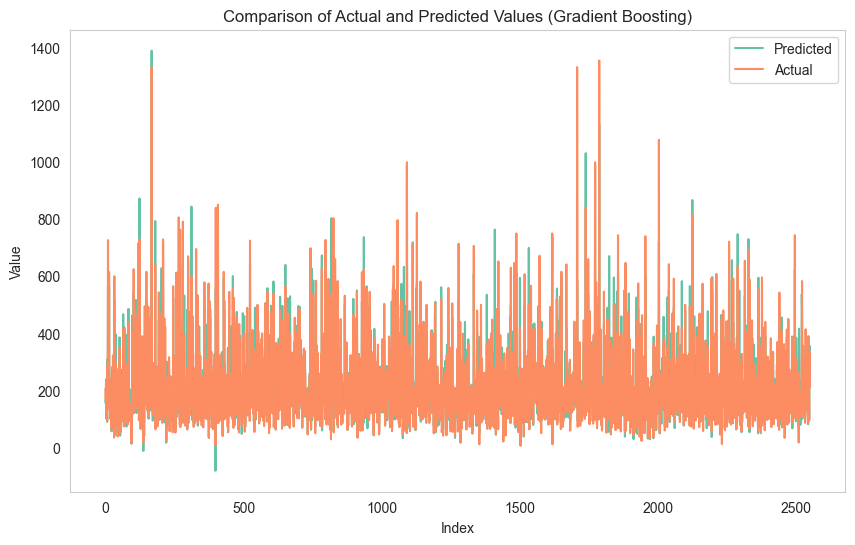

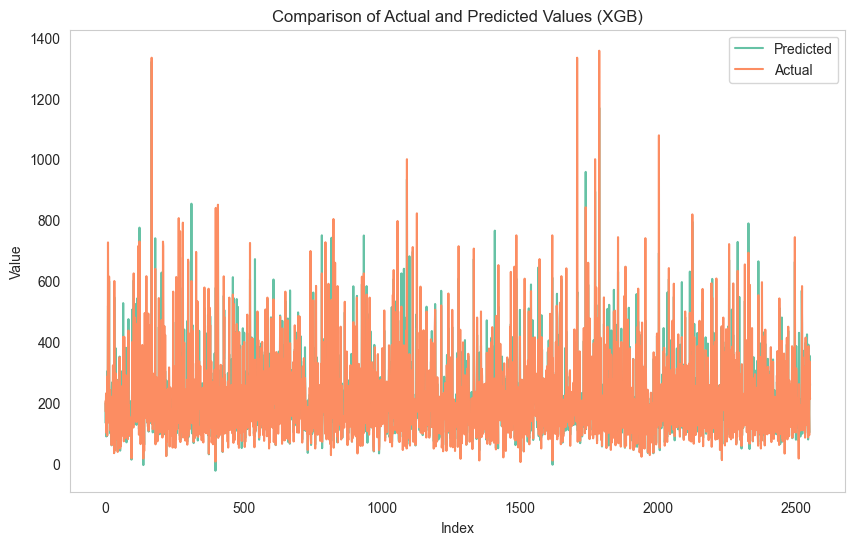

,Model,RMSE,MAE,R-squared
0,Gradient Boosting,61.696252,37.588598,0.803052
1,XGB,59.834628,36.070721,0.814759


In [16]:
# Initialize models
model1 = GradientBoostingRegressor(learning_rate=0.07453090674559311, 
                                   n_estimators=453, 
                                   max_depth=10, 
                                   min_samples_split=6, 
                                   min_samples_leaf=5, 
                                   subsample=0.9663558469604209, 
                                   max_features='sqrt')
model2 =  xgb.XGBRegressor(max_depth=10, 
                           learning_rate=0.045318559491601594, 
                           n_estimators=549, 
                           min_child_weight=1, 
                           gamma=0.07881344320495542, 
                           subsample=0.6942868821608839, 
                           colsample_bytree=0.47273243711559904, 
                           reg_alpha=0.9444673505597729, 
                           reg_lambda=0.5652159429293324)

# Initialize lists to store the results
results_tuned = []

# Iterate over the models
for name, model in [('Gradient Boosting', model1), ('XGB', model2)]:
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append results to the list
    results_tuned.append([name, rmse, mae, r2])

    # Plot comparison of actual vs predicted values for the current model
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_pred)), y_pred, label='Predicted')
    plt.plot(range(len(y_test)), y_test, label='Actual')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(f'Comparison of Actual and Predicted Values ({name})')
    plt.legend()
    plt.grid()
    plt.show()

# Create a DataFrame from the results
results_tuned_df = pd.DataFrame(results_tuned, columns=['Model', 'RMSE', 'MAE', 'R-squared'])
results_tuned_df

**Stacked Generalization**
- Stacking Regression combines various regression models to produce a final prediction with higher accuracy. This method constructs a collection of regression models, called a "stack," and uses predictions from these models as input features for a final regression model, known as a "meta-regression model."
- The training process of Stacking Regression involves two stages. In the first stage, the regression models in the stack are trained on the initial training dataset. Then, in the second stage, predictions from the base models are used as input features for the meta-regression model, which is trained on the initial training dataset.
- Stacking Regression can be extended to handle multiple levels of stack and meta-regression models, creating a flexible hierarchical structure. This allows for combining predictions from different models at various levels and enhancing the predictive capability of the approach.

RMSE: 60.89729955532915
MAE: 36.00618462725183
R-squared: 0.8081203024381727


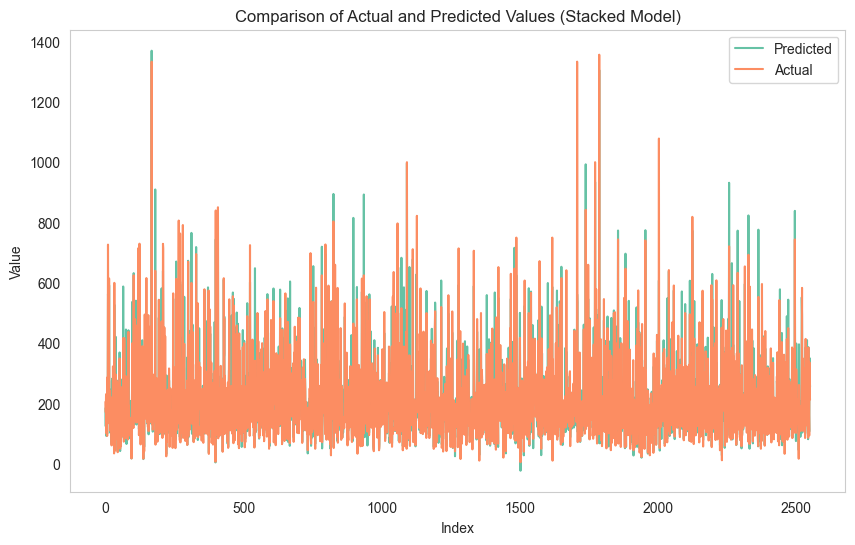

In [17]:
# Initialize base models
RF_model = RandomForestRegressor()
gboost_model = GradientBoostingRegressor(learning_rate=0.07453090674559311, 
                                        n_estimators=453, 
                                        max_depth=10, 
                                        min_samples_split=6, 
                                        min_samples_leaf=5, 
                                        subsample=0.9663558469604209, 
                                        max_features='sqrt')
xgb_model = xgb.XGBRegressor(max_depth=10, 
                            learning_rate=0.045318559491601594, 
                            n_estimators=549, 
                            min_child_weight=1, 
                            gamma=0.07881344320495542, 
                            subsample=0.6942868821608839, 
                            colsample_bytree=0.47273243711559904, 
                            reg_alpha=0.9444673505597729, 
                            reg_lambda=0.5652159429293324)

# Initialize meta model
meta_model = xgb.XGBRegressor(verbosity=0)

# Initialize stacking regressor
stack_regressor = StackingCVRegressor(regressors=(RF_model, gboost_model, xgb_model), 
                                      meta_regressor=meta_model, 
                                      use_features_in_secondary=True)

# Fit stacking regressor
stack_model = stack_regressor.fit(X_train, y_train)

# Make predictions
stack_preds = stack_model.predict(X_test)

# Calculate metrics
rmse_stackRegressor = np.sqrt(mean_squared_error(y_test, stack_preds))
mae_stackRegressor = mean_absolute_error(y_test, stack_preds)
r2_stackRegressor = r2_score(y_test, stack_preds)

print("RMSE:", rmse_stackRegressor)
print("MAE:", mae_stackRegressor)
print("R-squared:", r2_stackRegressor)

# Plot comparison of actual vs predicted values for the stacked model
plt.figure(figsize=(10, 6))
plt.plot(range(len(stack_preds)), stack_preds, label='Predicted')
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Actual and Predicted Values (Stacked Model)')
plt.legend()
plt.grid()
plt.show()

In [18]:
# Fit stacking regressor
stack_model.fit(X_train, y_train)

# Get regressors from stacking regressor
base_regressors = stack_model.regr_

# Get feature importance for each base regressor
for i, reg in enumerate(base_regressors):
    if hasattr(reg, 'feature_importances_'):
        feature_importance = reg.feature_importances_
        print(f"Feature Importance for Base Regressor {i}: {feature_importance}")
    else:
        print(f"Base Regressor {i} does not have feature importance attribute")


Feature Importance for Base Regressor 0: [5.06936989e-02 3.76436156e-02 3.21076740e-02 4.67979589e-02
 3.40851921e-02 3.58499312e-01 1.33307747e-01 3.61537788e-02
 3.48406666e-02 3.13300100e-03 2.20136215e-03 1.07236357e-03
 1.84025978e-03 5.18067491e-03 3.15593873e-03 2.22753103e-03
 2.80766850e-03 5.16308465e-03 1.82823519e-03 3.33104512e-03
 2.07176115e-03 2.91519178e-03 3.34219197e-03 1.60831495e-03
 8.30631597e-08 3.52652392e-03 4.66697706e-03 1.00863240e-05
 2.75319104e-03 1.63386091e-03 9.64241319e-03 4.35624265e-04
 9.56097995e-02 7.44683993e-03 2.31127615e-02 1.15658447e-02
 1.15036533e-04 8.67165506e-03 7.60337064e-07 4.17108302e-05
 3.11821518e-05 1.43181498e-05 4.09460398e-06 5.84734517e-04
 2.43497988e-03 1.03556304e-05 9.50668062e-05 4.96050248e-03
 8.12746136e-06 1.08433621e-04 3.24566513e-03 7.50771195e-08
 4.93426232e-04 1.26430730e-03 2.02418221e-06 1.81020116e-03
 4.00566597e-06 9.68706311e-03]
Feature Importance for Base Regressor 1: [3.53231904e-02 4.48158936e-02 3

**Result**

In [19]:
new_data = pd.DataFrame([
    {'Model': 'Stacked', 'RMSE': rmse_stackRegressor, 'MAE': mae_stackRegressor, 'R-squared': r2_stackRegressor}
])

results_df = pd.concat([results_df, new_data], ignore_index=True)
results_df

,Model,RMSE,MAE,R-squared
0,Linear Regression,84.384847,56.226380,0.631564
1,Decision Tree,89.280782,50.415210,0.587571
2,Random Forest,64.414767,37.471662,0.785314
3,Gradient Boosting,69.021994,45.487201,0.753505
4,Stacked,60.897300,36.006185,0.808120


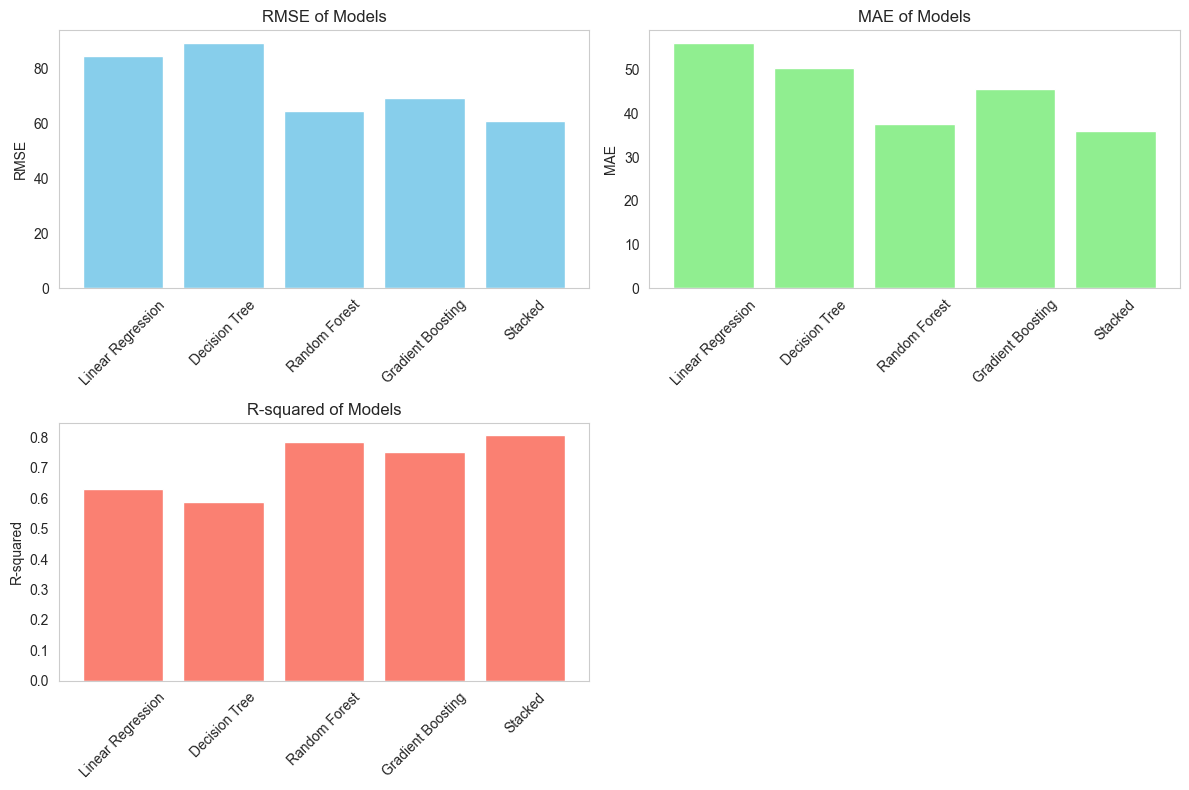

In [20]:
plt.figure(figsize=(12, 8))

# RMSE
plt.subplot(2, 2, 1)
plt.bar(results_df['Model'], results_df['RMSE'], color='skyblue')
plt.title('RMSE of Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(False) 

# MAE
plt.subplot(2, 2, 2)
plt.bar(results_df['Model'], results_df['MAE'], color='lightgreen')
plt.title('MAE of Models')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.grid(False) 

# R-squared
plt.subplot(2, 2, 3)
plt.bar(results_df['Model'], results_df['R-squared'], color='salmon')
plt.title('R-squared of Models')
plt.ylabel('R-squared')
plt.xticks(rotation=45)
plt.grid(False) 

plt.tight_layout()
plt.show()

**Conclusion - Basic Model**
- Random Forest and Stacked Model are the top-performing models in predicting house prices, with the lowest RMSE and MAE along with the highest R-squared. Particularly, the Stacked Model outperforms with lower RMSE and MAE compared to Random Forest.
- Although the Gradient Boosting model has lower RMSE and MAE compared to some other models such as Linear Regression and Decision Tree, its R-squared is not as high, indicating lower fit to the data.

**Compute RMSE with cross validation**

In [21]:
from sklearn.model_selection import KFold

def rmse_kfold(model, n_folds):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(np.mean(rmse))

In [22]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Stacked', stack_model)
]

# List to store RMSE values
rmse_values_kfold = []

# Calculate RMSE for each model
for name, model in models:
    print(f"Calculating RMSE for {name}...")
    rmse_mean = rmse_kfold(model, 5)
    rmse_values_kfold.append({'Model': name, 'RMSE': rmse_mean})

# Create DataFrame
cross_df = pd.DataFrame(rmse_values_kfold)

# Display the results
cross_df

Calculating RMSE for Linear Regression...
Calculating RMSE for Decision Tree...
Calculating RMSE for Random Forest...
Calculating RMSE for Gradient Boosting...
Calculating RMSE for Stacked...


,Model,RMSE
0,Linear Regression,103.111459
1,Decision Tree,115.051993
2,Random Forest,85.739290
3,Gradient Boosting,88.226821
4,Stacked,79.960656


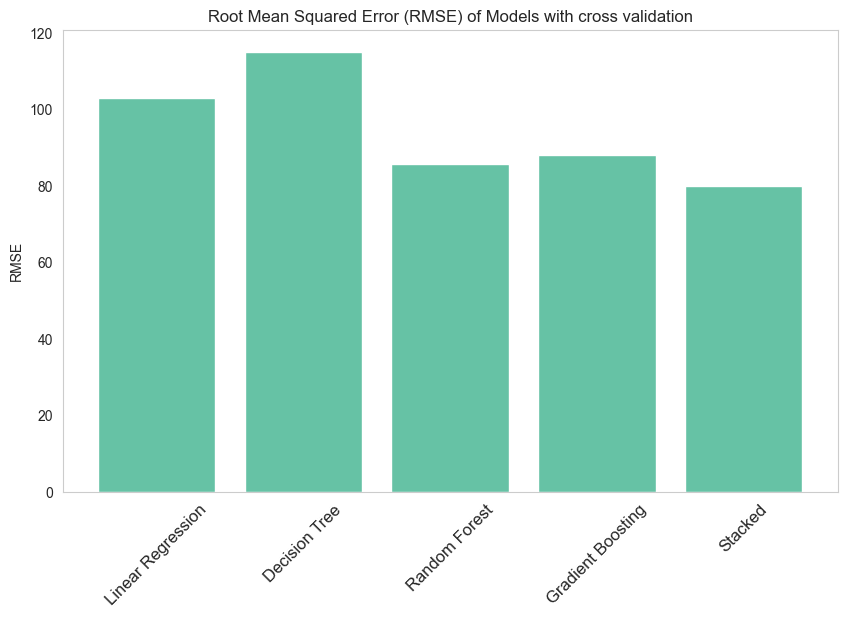

In [23]:
# RMSE with cross validation kfold = 5
plt.figure(figsize=(10, 6))
plt.bar(cross_df['Model'], cross_df['RMSE'])
plt.title('Root Mean Squared Error (RMSE) of Models with cross validation')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.xticks(fontname='Arial', fontsize=12)
plt.grid(False) 
plt.show()

- Linear Regression and Decision Tree models exhibit higher RMSE values compared to other models, indicating less accurate predictions for house prices.
- Based on the RMSE values obtained from k-fold cross-validation, the Stacked Model shows the best performance in predicting house prices, followed by the Random Forest. 